In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols                                             
from statsmodels.stats.multicomp import pairwise_tukeyhsd            
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Melbourne_housing_extra_data.csv.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19740 non-null  object 
 1   Address        19740 non-null  object 
 2   Rooms          19740 non-null  int64  
 3   Type           19740 non-null  object 
 4   Price          15396 non-null  float64
 5   Method         19740 non-null  object 
 6   SellerG        19740 non-null  object 
 7   Date           19740 non-null  object 
 8   Distance       19732 non-null  float64
 9   Postcode       19732 non-null  float64
 10  Bedroom2       15327 non-null  float64
 11  Bathroom       15327 non-null  float64
 12  Car            15327 non-null  float64
 13  Landsize       14944 non-null  float64
 14  BuildingArea   8617 non-null   float64
 15  YearBuilt      9351 non-null   float64
 16  CouncilArea    15296 non-null  object 
 17  Lattitude      15448 non-null  float64
 18  Longti

In [3]:
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [4]:
df.tail(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
19737,Yarraville,2 Adeney St,2,h,750000.0,SP,hockingstuart,29/07/2017,6.3,3013.0,3.0,2.0,2.0,1999.0,199.0,140.00,Darebin,-37.75948,144.99615,Western Metropolitan,6543.0
19738,Yarraville,54 Pentland Pde,6,h,2450000.0,VB,Village,29/07/2017,6.3,3013.0,3.0,2.0,1.0,2011.0,238.0,118.00,Hume,-37.70322,144.88236,Western Metropolitan,6543.0
19739,Yarraville,10/127 Somerville Rd,3,t,645000.0,SP,Jas,29/07/2017,6.3,3013.0,2.0,1.0,1.0,1980.0,0.0,66.32,Hume,-37.69815,144.88019,Western Metropolitan,6543.0


In [5]:
df.sample(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8818,Richmond,77 Buckingham St,3,h,1182000.0,S,Biggin,14/05/2016,2.6,3121.0,3.0,1.0,1.0,199.0,110.0,1920.0,Yarra,-37.8139,145.0039,Northern Metropolitan,14949.0
3903,Elwood,4/25 Kingsley St,1,u,451000.0,S,Chisholm,19/11/2016,7.7,3184.0,1.0,1.0,1.0,0.0,NaN,1970.0,Port Phillip,-37.8895,144.9902,Southern Metropolitan,8989.0
6698,Melbourne,1610/83 Queens Rd,1,u,435000.0,SP,hockingstuart,15/10/2016,2.8,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,17496.0


In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,19740.000000,1.539600e+04,19732.000000,19732.000000,15327.000000,15327.000000,15327.000000,14944.000000,8617.000000,9351.000000,15448.000000,15448.000000,19732.000000
mean,2.947163,1.054957e+06,9.861509,3106.533904,2.900568,1.548509,1.578065,583.917090,196.806973,1874.165655,-37.811892,144.996632,7509.802706
std,0.981048,6.452557e+05,5.554233,88.429928,1.007491,0.713385,0.972221,3785.423175,561.558007,393.354888,0.072708,0.096178,4419.678648
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-38.182550,144.431620,249.000000
25%,2.000000,6.300000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,166.000000,94.000000,1930.000000,-37.856860,144.939323,4407.000000
50%,3.000000,8.800000e+05,9.200000,3101.000000,3.000000,1.000000,2.000000,420.000000,132.000000,1965.000000,-37.808965,145.000900,6567.000000
75%,4.000000,1.301000e+06,12.600000,3147.000000,3.000000,2.000000,2.000000,663.000000,199.000000,1997.000000,-37.761897,145.054710,10331.000000
max,12.000000,9.000000e+06,47.400000,3978.000000,30.000000,12.000000,26.000000,433014.000000,40468.000000,2106.000000,-37.413810,145.526350,21650.000000


In [7]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [8]:
df.shape

(19740, 21)

In [9]:
df.isnull().sum()*100/len(df)

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            22.006079
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.040527
Postcode          0.040527
Bedroom2         22.355623
Bathroom         22.355623
Car              22.355623
Landsize         24.295846
BuildingArea     56.347518
YearBuilt        52.629179
CouncilArea      22.512665
Lattitude        21.742655
Longtitude       21.742655
Regionname        0.040527
Propertycount     0.040527
dtype: float64

In [10]:
df.drop(['BuildingArea','YearBuilt'],axis=1,inplace=True)

In [11]:
df.shape

(19740, 19)

In [12]:
numeric=df.select_dtypes(include='number')
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          19740 non-null  int64  
 1   Price          15396 non-null  float64
 2   Distance       19732 non-null  float64
 3   Postcode       19732 non-null  float64
 4   Bedroom2       15327 non-null  float64
 5   Bathroom       15327 non-null  float64
 6   Car            15327 non-null  float64
 7   Landsize       14944 non-null  float64
 8   Lattitude      15448 non-null  float64
 9   Longtitude     15448 non-null  float64
 10  Propertycount  19732 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.7 MB


In [13]:
b=[]
for i in numeric:
    if len(df[i].unique())>25:
        b.append(i)
print(b)

['Price', 'Distance', 'Postcode', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']


In [14]:
df.Price.value_counts()

600000.0     133
650000.0     130
1100000.0    129
800000.0     121
1200000.0    118
            ... 
1111000.0      1
1224000.0      1
1417250.0      1
490500.0       1
525300.0       1
Name: Price, Length: 2298, dtype: int64

In [15]:
df.Price.fillna(df.Price.median(),inplace=True)

In [16]:
df.Distance.value_counts()

11.2    1225
9.2      665
7.8      537
13.9     499
4.6      436
        ... 
23.6       1
1.4        1
45.2       1
33.8       1
35.5       1
Name: Distance, Length: 209, dtype: int64

In [17]:
df.Distance.fillna(df.Distance.median(),inplace=True)

In [18]:
df.Postcode.value_counts()

3073.0    548
3046.0    443
3121.0    410
3020.0    410
3058.0    369
         ... 
3027.0      1
3096.0      1
3202.0      1
3796.0      1
3757.0      1
Name: Postcode, Length: 204, dtype: int64

In [19]:
df.Postcode.fillna(df.Postcode.median(),inplace=True)

In [20]:
df.Bedroom2.value_counts()

3.0     6464
2.0     4374
4.0     2865
1.0      843
5.0      658
6.0       79
0.0       16
7.0       14
8.0        7
9.0        4
30.0       1
20.0       1
10.0       1
Name: Bedroom2, dtype: int64

In [21]:
df.Bedroom2=df.Bedroom2.fillna(df.Bedroom2.mode()[0])

In [22]:
df.Bathroom.value_counts()

1.0     8389
2.0     5604
3.0     1094
4.0      143
0.0       45
5.0       42
6.0        4
7.0        3
8.0        2
12.0       1
Name: Bathroom, dtype: int64

In [23]:
df.Bathroom=df.Bathroom.fillna(df.Bathroom.mode()[0])

In [24]:
df.Car.value_counts()

1.0     6338
2.0     6243
0.0     1276
3.0      802
4.0      530
5.0       57
6.0       55
7.0       12
8.0        9
10.0       2
11.0       1
26.0       1
9.0        1
Name: Car, dtype: int64

In [25]:
df.Car=df.Car.fillna(df.Car.mode()[0])

In [26]:
df.Landsize.value_counts()

0.0       2309
650.0       88
697.0       62
1970.0      57
1960.0      56
          ... 
1669.0       1
6186.0       1
5530.0       1
1055.0       1
1857.0       1
Name: Landsize, Length: 1541, dtype: int64

In [27]:
df.Landsize.fillna(df.Landsize.median(),inplace=True)

In [28]:
df.CouncilArea.value_counts()

Boroondara           1664
Moreland             1404
Moonee Valley        1131
Stonnington          1130
Darebin              1094
Glen Eira            1012
Port Phillip          847
Yarra                 839
Maribyrnong           828
Banyule               736
Bayside               666
Melbourne             581
Hobsons Bay           495
Brimbank              472
Monash                439
Whitehorse            417
Manningham            370
Kingston              219
Hume                  173
Whittlesea            169
Maroondah             103
Wyndham                98
Knox                   88
Greater Dandenong      70
Melton                 68
Frankston              56
Casey                  44
Nillumbik              36
Yarra Ranges           25
Macedon Ranges          9
Cardinia                8
Moorabool               3
Mitchell                2
Name: CouncilArea, dtype: int64

In [29]:
df.CouncilArea=df.CouncilArea.fillna(df.CouncilArea.mode()[0])

In [30]:
df.Lattitude.value_counts()

-37.83610    24
-37.84240    22
-37.81980    20
-37.84140    17
-37.85100    16
             ..
-37.99406     1
-37.86838     1
-37.89187     1
-37.87718     1
-37.69815     1
Name: Lattitude, Length: 5927, dtype: int64

In [31]:
df.Lattitude.fillna(df.Lattitude.median(),inplace=True)

In [32]:
df.Longtitude.value_counts()

144.99660    20
145.01040    16
144.99100    16
144.98500    16
145.00010    16
             ..
145.10873     1
145.15852     1
145.14311     1
145.05415     1
144.88019     1
Name: Longtitude, Length: 6538, dtype: int64

In [33]:
df.Longtitude.fillna(df.Longtitude.median(),inplace=True)

In [34]:
df.Regionname.value_counts()

Southern Metropolitan         7615
Northern Metropolitan         5508
Western Metropolitan          3884
Eastern Metropolitan          2018
South-Eastern Metropolitan     557
Eastern Victoria                73
Northern Victoria               42
Western Victoria                35
Name: Regionname, dtype: int64

In [35]:
df.Regionname=df.Regionname.fillna(df.Regionname.mode()[0])

In [36]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df['Regionname'] = lr.fit_transform(df['Regionname'])

In [37]:
df.Regionname.value_counts()

5    7623
2    5508
6    3884
0    2018
4     557
1      73
3      42
7      35
Name: Regionname, dtype: int64

In [38]:
df.Propertycount.value_counts()

21650.0    548
8870.0     461
14949.0    372
10969.0    367
14577.0    329
          ... 
1058.0       1
1721.0       1
642.0        1
3307.0       1
2170.0       1
Name: Propertycount, Length: 325, dtype: int64

In [39]:
df.Propertycount.fillna(df.Propertycount.median(),inplace=True)

In [40]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

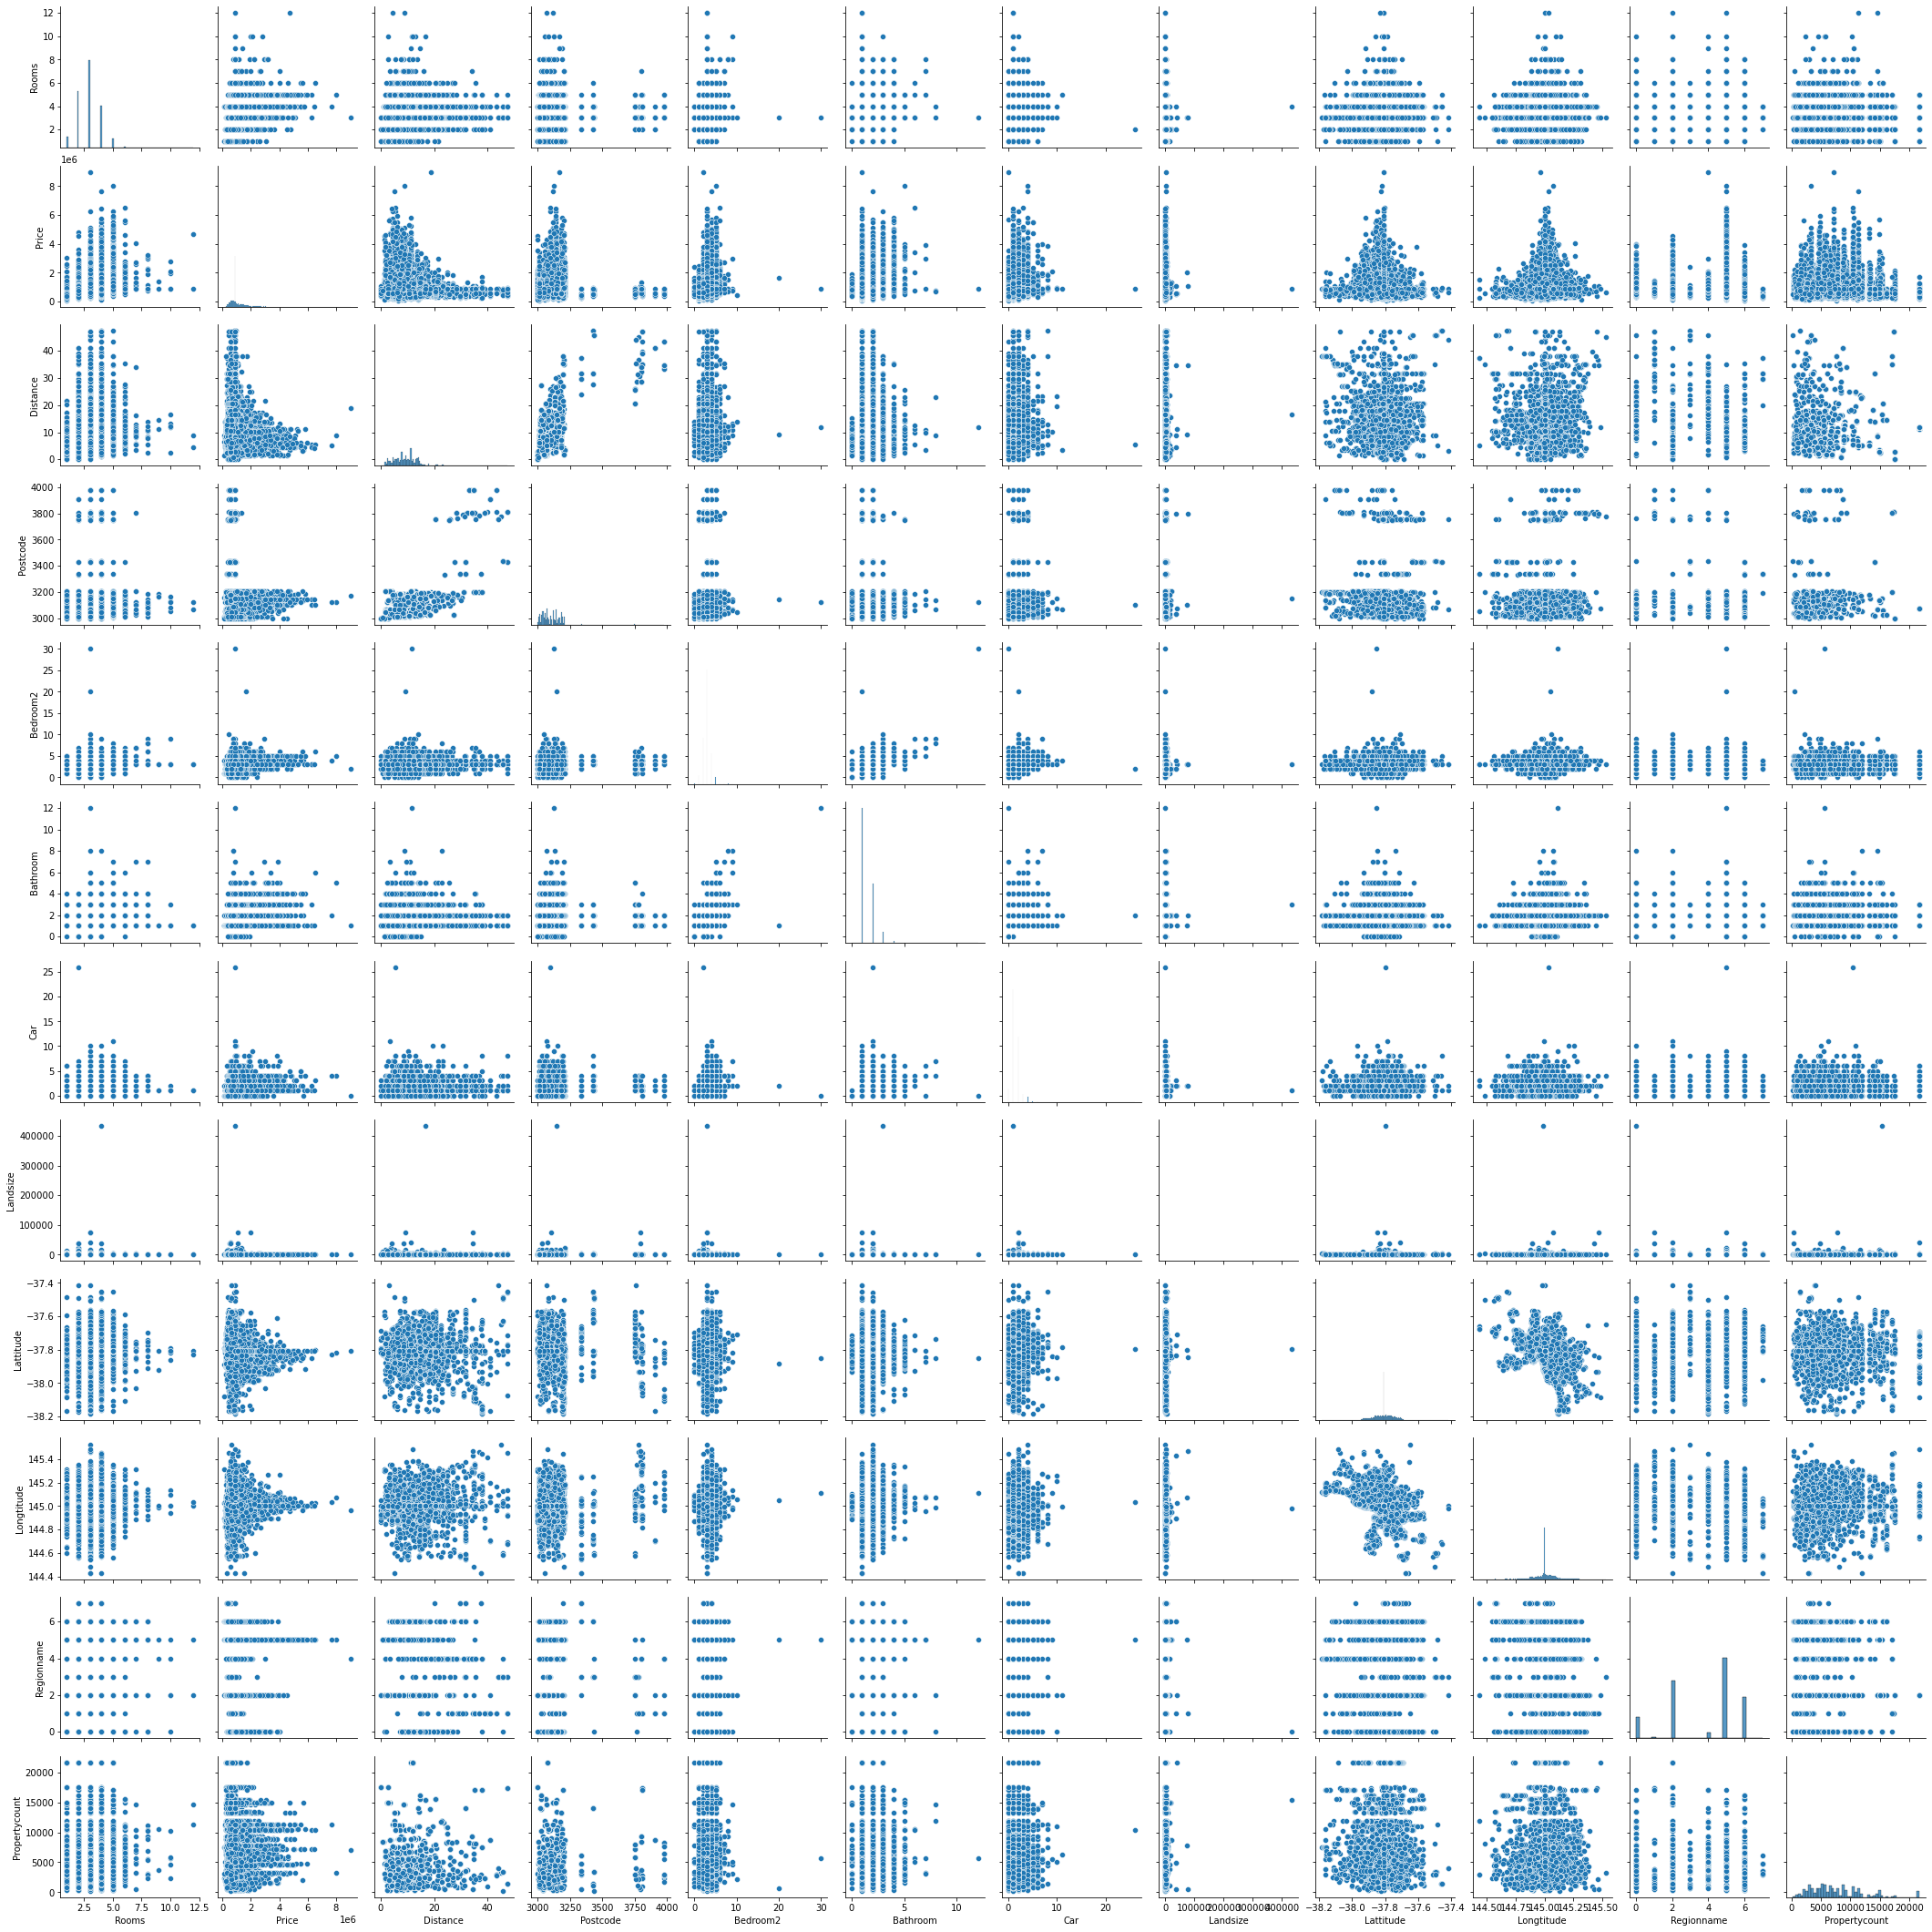

In [41]:
sns.pairplot(df)

In [42]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [43]:
#Suburb
len(df.Suburb.unique())

330

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Suburb', ylabel='count'>

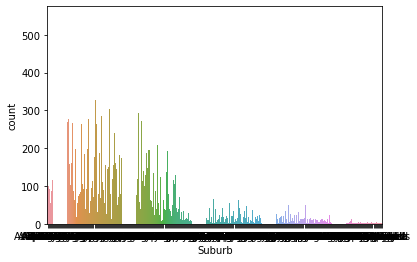

In [44]:
sns.countplot(df.Suburb)

In [45]:
df.drop(['Suburb'],axis=1,inplace=True)

In [46]:
df.shape

(19740, 18)

In [47]:
#Address
len(df.Address.unique())

19403

In [48]:
df.drop(['Address'],axis=1,inplace=True)

In [49]:
df.shape

(19740, 17)

In [50]:
#Rooms
df.Rooms.value_counts()

3     8328
2     5351
4     3995
1     1011
5      910
6      107
7       16
8       13
10       5
9        2
12       2
Name: Rooms, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rooms', ylabel='count'>

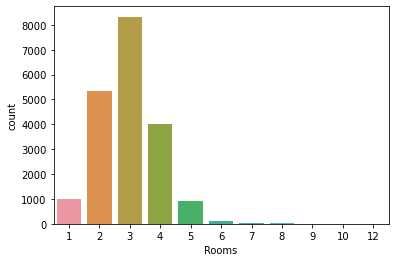

In [51]:
sns.countplot(df.Rooms)

In [52]:
#Type
df.Type.value_counts()

h    12992
u     4640
t     2108
Name: Type, dtype: int64

In [53]:
df.Type=df.Type.map({'h':1,'u':2,'t':3})

In [54]:
df.Type.value_counts()

1    12992
2     4640
3     2108
Name: Type, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

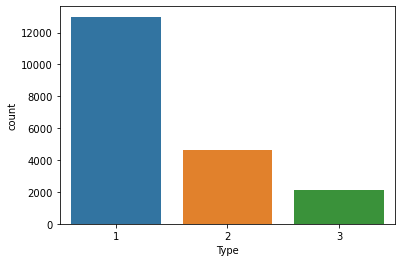

In [55]:
sns.countplot(df.Type)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type'>

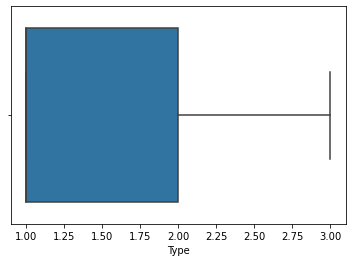

In [56]:
sns.boxplot(df.Type)

In [57]:
#Price
df.Price.value_counts()

880000.0     4404
600000.0      133
650000.0      130
1100000.0     129
800000.0      121
             ... 
1111000.0       1
1224000.0       1
1417250.0       1
490500.0        1
525300.0        1
Name: Price, Length: 2298, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

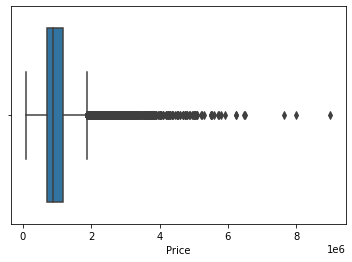

In [58]:
sns.boxplot(df.Price)

In [59]:
q1=df.Price.quantile(0.25)
q3=df.Price.quantile(0.75)
iqr=q3-q1
upper_bond_Price=q3+(1.5*iqr)
lower_bond_Price=q1-(1.5*iqr)

In [60]:
df.Price=np.where(df.Price>upper_bond_Price, upper_bond_Price, np.where(df.Price <lower_bond_Price, lower_bond_Price, df.Price))

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

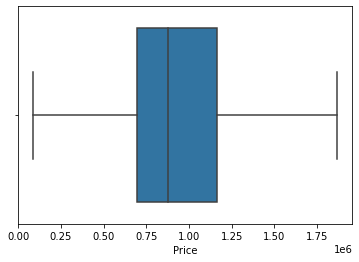

In [61]:
sns.boxplot(df.Price)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

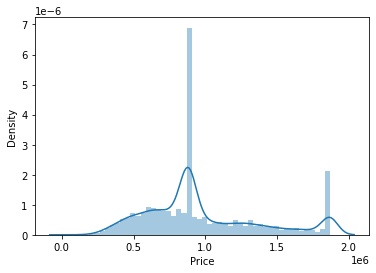

In [62]:
sns.distplot(df.Price)

In [63]:
#Method
df.Method.value_counts()

S     11478
SP     2812
PI     2659
VB     1512
SN      870
PN      181
SA      132
W        78
SS       18
Name: Method, dtype: int64

In [64]:
df.Method=df.Method.map({'S':1,'SP':2,'PI':3,'VB':4,'SN':5,'PN':6,'SA':7,'W':8,'SS':9})

In [65]:
df.Method.value_counts()

1    11478
2     2812
3     2659
4     1512
5      870
6      181
7      132
8       78
9       18
Name: Method, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Method', ylabel='count'>

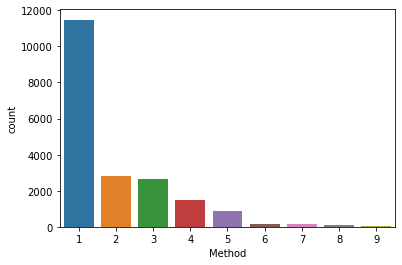

In [66]:
sns.countplot(df.Method)

In [67]:
#SellerG
df.SellerG.value_counts()

Nelson                 2072
Jellis                 1938
hockingstuart          1686
Barry                  1589
Marshall               1265
                       ... 
Direct                    1
Fletchers/Fletchers       1
Johnston                  1
Grant's                   1
Bowman                    1
Name: SellerG, Length: 308, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SellerG', ylabel='count'>

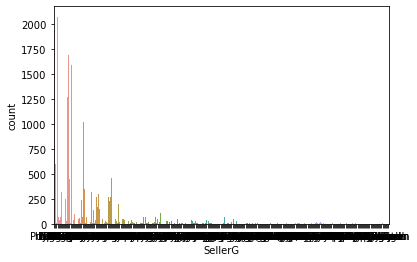

In [68]:
sns.countplot(df.SellerG)

In [69]:
df.drop(['SellerG'],axis=1,inplace=True)

In [70]:
df.shape

(19740, 16)

In [71]:
#Date
df.Date.value_counts()

27/05/2017    770
3/06/2017     689
17/06/2017    637
24/06/2017    607
27/11/2016    575
25/02/2017    555
12/08/2017    546
4/03/2017     532
10/12/2016    528
18/03/2017    513
29/07/2017    489
1/07/2017     482
12/11/2016    475
3/12/2016     472
15/10/2016    466
20/05/2017    457
28/05/2016    454
8/04/2017     451
22/07/2017    449
18/06/2016    441
19/11/2016    431
8/07/2017     428
13/05/2017    422
15/07/2017    421
7/05/2016     419
28/08/2016    390
8/10/2016     386
10/09/2016    382
24/09/2016    377
17/09/2016    377
4/06/2016     368
27/06/2016    357
29/04/2017    341
22/05/2016    336
3/09/2016     333
16/04/2016    333
14/05/2016    322
7/11/2016     306
22/08/2016    293
30/07/2016    271
6/08/2016     258
6/05/2017     236
13/08/2016    232
22/04/2017    226
16/07/2016    219
26/07/2016    199
23/04/2016    169
11/02/2017    132
12/06/2016     76
11/03/2017     65
4/02/2016      44
28/01/2016      3
Name: Date, dtype: int64

In [72]:
df=df.rename({'Date':'Date1'},axis=1)

In [73]:
df.Date1.value_counts()

27/05/2017    770
3/06/2017     689
17/06/2017    637
24/06/2017    607
27/11/2016    575
25/02/2017    555
12/08/2017    546
4/03/2017     532
10/12/2016    528
18/03/2017    513
29/07/2017    489
1/07/2017     482
12/11/2016    475
3/12/2016     472
15/10/2016    466
20/05/2017    457
28/05/2016    454
8/04/2017     451
22/07/2017    449
18/06/2016    441
19/11/2016    431
8/07/2017     428
13/05/2017    422
15/07/2017    421
7/05/2016     419
28/08/2016    390
8/10/2016     386
10/09/2016    382
24/09/2016    377
17/09/2016    377
4/06/2016     368
27/06/2016    357
29/04/2017    341
22/05/2016    336
3/09/2016     333
16/04/2016    333
14/05/2016    322
7/11/2016     306
22/08/2016    293
30/07/2016    271
6/08/2016     258
6/05/2017     236
13/08/2016    232
22/04/2017    226
16/07/2016    219
26/07/2016    199
23/04/2016    169
11/02/2017    132
12/06/2016     76
11/03/2017     65
4/02/2016      44
28/01/2016      3
Name: Date1, dtype: int64

In [74]:
df['Date']=df.Date1.str.split('/').str[0]
df['Month']=df.Date1.str.split('/').str[1]
df['Year']=df.Date1.str.split('/').str[2]

In [75]:
#df['Date']=df.Date1.apply(lambda x:x.split("/")[0]
#df['Month']=df.Date1.apply(lambda x:x.split("/")[1]
#df['Year']=df.Date1.apply(lambda x:x.split("/")[2]

In [76]:
df.drop(['Date1'],axis=1,inplace=True)

In [77]:
df.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Date,Month,Year
0,2,1,880000.0,9,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra,-37.8014,144.9958,2,4019.0,3,09,2016
1,2,1,1480000.0,1,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,2,4019.0,3,12,2016
2,2,1,1035000.0,1,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,2,4019.0,4,02,2016
3,3,2,880000.0,4,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra,-37.8114,145.0116,2,4019.0,4,02,2016
4,3,1,1465000.0,2,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,2,4019.0,4,03,2017


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          19740 non-null  int64  
 1   Type           19740 non-null  int64  
 2   Price          19740 non-null  float64
 3   Method         19740 non-null  int64  
 4   Distance       19740 non-null  float64
 5   Postcode       19740 non-null  float64
 6   Bedroom2       19740 non-null  float64
 7   Bathroom       19740 non-null  float64
 8   Car            19740 non-null  float64
 9   Landsize       19740 non-null  float64
 10  CouncilArea    19740 non-null  object 
 11  Lattitude      19740 non-null  float64
 12  Longtitude     19740 non-null  float64
 13  Regionname     19740 non-null  int32  
 14  Propertycount  19740 non-null  float64
 15  Date           19740 non-null  object 
 16  Month          19740 non-null  object 
 17  Year           19740 non-null  object 
dtypes: flo

In [79]:
df.Date=df.Date.astype(int)
df.Month=df.Month.astype(int)
df.Year=df.Year.astype(int)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          19740 non-null  int64  
 1   Type           19740 non-null  int64  
 2   Price          19740 non-null  float64
 3   Method         19740 non-null  int64  
 4   Distance       19740 non-null  float64
 5   Postcode       19740 non-null  float64
 6   Bedroom2       19740 non-null  float64
 7   Bathroom       19740 non-null  float64
 8   Car            19740 non-null  float64
 9   Landsize       19740 non-null  float64
 10  CouncilArea    19740 non-null  object 
 11  Lattitude      19740 non-null  float64
 12  Longtitude     19740 non-null  float64
 13  Regionname     19740 non-null  int32  
 14  Propertycount  19740 non-null  float64
 15  Date           19740 non-null  int32  
 16  Month          19740 non-null  int32  
 17  Year           19740 non-null  int32  
dtypes: flo

In [81]:
#Distance
df.Distance.value_counts()

11.2    1225
9.2      673
7.8      537
13.9     499
4.6      436
        ... 
23.6       1
1.4        1
45.2       1
33.8       1
35.5       1
Name: Distance, Length: 209, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

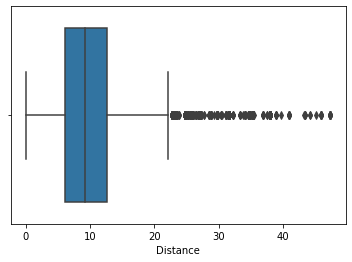

In [82]:
sns.boxplot(df.Distance)

In [83]:
q1=df.Distance.quantile(0.25)
q3=df.Distance.quantile(0.75)
iqr=q3-q1
upper_bond_Distance=q3+(1.5*iqr)
lower_bond_Distance=q1-(1.5*iqr)

In [84]:
df.Distance=np.where(df.Distance>upper_bond_Distance, upper_bond_Distance, np.where(df.Distance <lower_bond_Distance, lower_bond_Distance, df.Distance))

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance'>

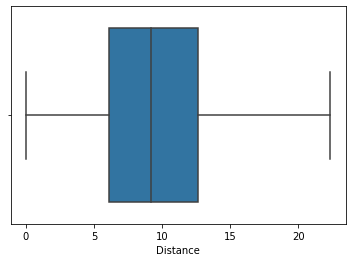

In [85]:
sns.boxplot(df.Distance)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Distance', ylabel='Density'>

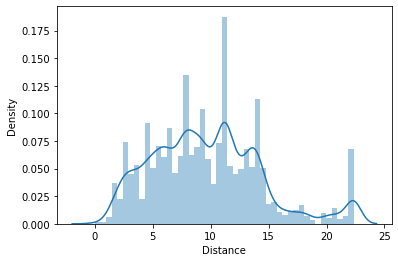

In [86]:
sns.distplot(df.Distance)

In [87]:
#Postcode
df.Postcode.value_counts()

3073.0    548
3046.0    443
3121.0    410
3020.0    410
3058.0    369
         ... 
3027.0      1
3096.0      1
3202.0      1
3796.0      1
3757.0      1
Name: Postcode, Length: 204, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Postcode'>

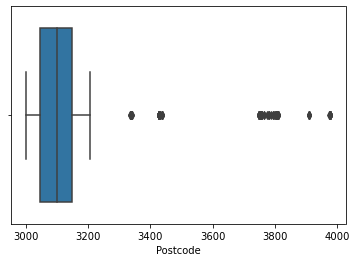

In [88]:
sns.boxplot(df.Postcode)

In [89]:
q1=df.Postcode.quantile(0.25)
q3=df.Postcode.quantile(0.75)
iqr=q3-q1
upper_bond_Postcode=q3+(1.5*iqr)
lower_bond_Postcode=q1-(1.5*iqr)

In [90]:
df.Postcode=np.where(df.Postcode>upper_bond_Postcode, upper_bond_Postcode, np.where(df.Postcode <lower_bond_Postcode, lower_bond_Postcode, df.Postcode))

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Postcode'>

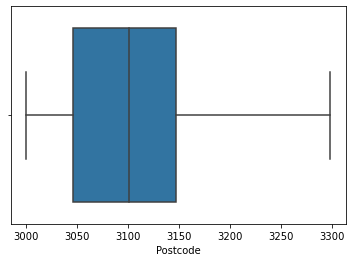

In [91]:
sns.boxplot(df.Postcode)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Postcode', ylabel='Density'>

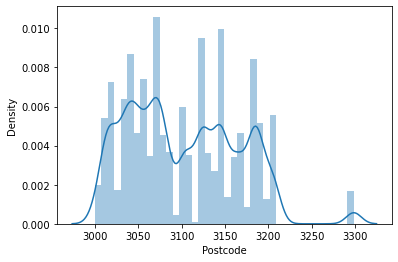

In [92]:
sns.distplot(df.Postcode)

In [93]:
#Bedroom2
df.Bedroom2.unique()

array([ 2.,  3.,  4.,  6.,  1.,  5.,  7.,  0.,  8.,  9., 30., 20., 10.])

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bedroom2', ylabel='count'>

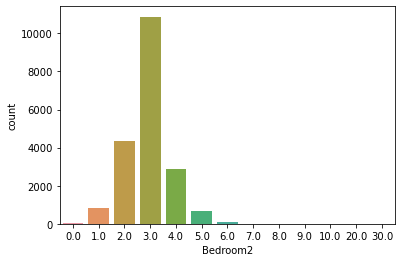

In [94]:
sns.countplot(df.Bedroom2)

In [95]:
#Bathroom
df.Bathroom.value_counts()

1.0     12802
2.0      5604
3.0      1094
4.0       143
0.0        45
5.0        42
6.0         4
7.0         3
8.0         2
12.0        1
Name: Bathroom, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bathroom', ylabel='count'>

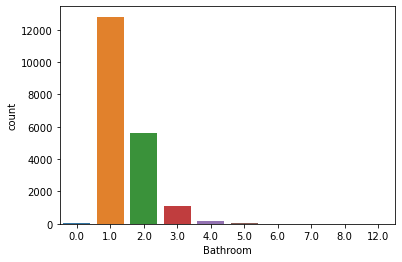

In [96]:
sns.countplot(df.Bathroom)

In [97]:
df.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Date', 'Month', 'Year'],
      dtype='object')

In [98]:
#Car
df.Car.value_counts()

1.0     10751
2.0      6243
0.0      1276
3.0       802
4.0       530
5.0        57
6.0        55
7.0        12
8.0         9
10.0        2
11.0        1
26.0        1
9.0         1
Name: Car, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car', ylabel='count'>

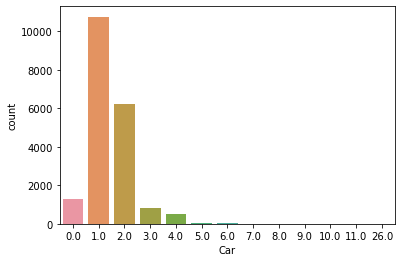

In [99]:
sns.countplot(df.Car)

In [100]:
#Landsize
df.Landsize.value_counts()

420.0     4815
0.0       2309
650.0       88
697.0       62
1970.0      57
          ... 
1669.0       1
6186.0       1
5530.0       1
1055.0       1
1857.0       1
Name: Landsize, Length: 1541, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Landsize'>

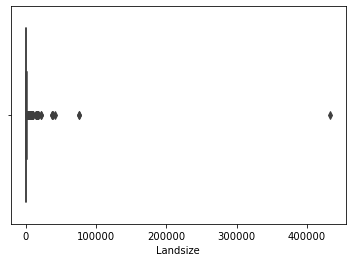

In [101]:
sns.boxplot(df.Landsize)

In [102]:
df.drop(['Landsize'],axis=1,inplace=True)

In [103]:
df.shape

(19740, 17)

In [104]:
#CouncilArea
df.CouncilArea.value_counts()

Boroondara           6108
Moreland             1404
Moonee Valley        1131
Stonnington          1130
Darebin              1094
Glen Eira            1012
Port Phillip          847
Yarra                 839
Maribyrnong           828
Banyule               736
Bayside               666
Melbourne             581
Hobsons Bay           495
Brimbank              472
Monash                439
Whitehorse            417
Manningham            370
Kingston              219
Hume                  173
Whittlesea            169
Maroondah             103
Wyndham                98
Knox                   88
Greater Dandenong      70
Melton                 68
Frankston              56
Casey                  44
Nillumbik              36
Yarra Ranges           25
Macedon Ranges          9
Cardinia                8
Moorabool               3
Mitchell                2
Name: CouncilArea, dtype: int64

In [105]:
#sns.boxplot(df.CouncilArea)

In [106]:
df.drop(['CouncilArea'],axis=1,inplace=True)

In [107]:
df.shape

(19740, 16)

In [108]:
#Lattitude
df.Lattitude.value_counts()

-37.808965    4292
-37.836100      24
-37.842400      22
-37.819800      20
-37.841400      17
              ... 
-37.994060       1
-37.868380       1
-37.891870       1
-37.877180       1
-37.698150       1
Name: Lattitude, Length: 5928, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lattitude'>

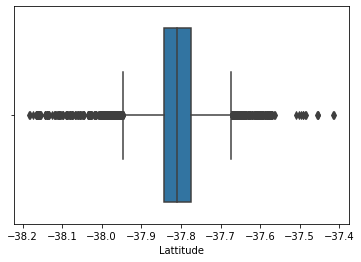

In [109]:
sns.boxplot(df.Lattitude)

In [110]:
q1=df.Lattitude.quantile(0.25)
q3=df.Lattitude.quantile(0.75)
iqr=q3-q1
upper_bond_Lattitude=q3+(1.5*iqr)
lower_bond_Lattitude=q1-(1.5*iqr)

In [111]:
df.Lattitude=np.where(df.Lattitude>upper_bond_Lattitude, upper_bond_Lattitude, np.where(df.Lattitude <lower_bond_Lattitude, lower_bond_Lattitude, df.Lattitude))

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lattitude'>

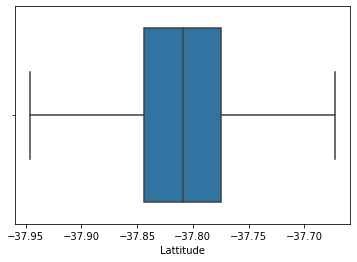

In [112]:
sns.boxplot(df.Lattitude)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Lattitude', ylabel='Density'>

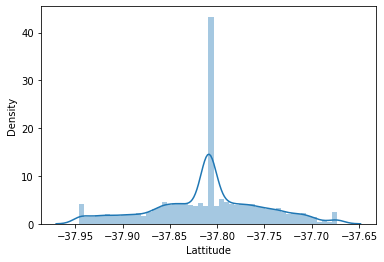

In [113]:
sns.distplot(df.Lattitude)

In [114]:
#Longtitude
len(df.Longtitude.unique())

6538

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Longtitude'>

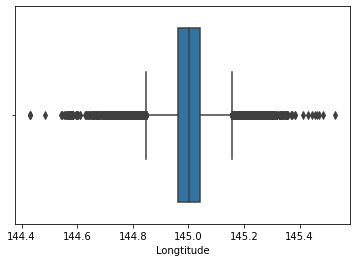

In [115]:
sns.boxplot(df.Longtitude)

In [116]:
q1=df.Longtitude.quantile(0.25)
q3=df.Longtitude.quantile(0.75)
iqr=q3-q1
upper_bond_Longtitude=q3+(1.5*iqr)
lower_bond_Longtitude=q1-(1.5*iqr)

In [117]:
df.Longtitude=np.where(df.Longtitude>upper_bond_Longtitude, upper_bond_Longtitude, np.where(df.Longtitude <lower_bond_Longtitude, lower_bond_Longtitude, df.Longtitude))

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Longtitude'>

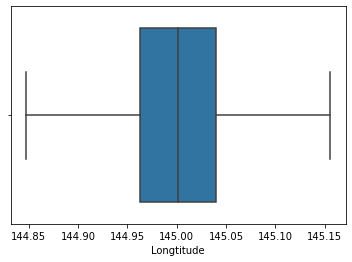

In [118]:
sns.boxplot(df.Longtitude)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Longtitude', ylabel='Density'>

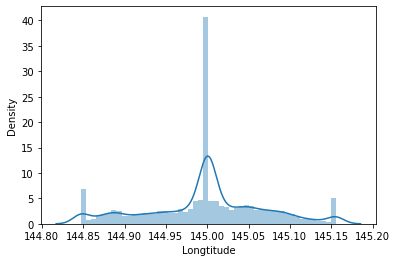

In [119]:
sns.distplot(df.Longtitude)

In [120]:
#Regionname
len(df.Regionname.unique())

8

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Regionname', ylabel='count'>

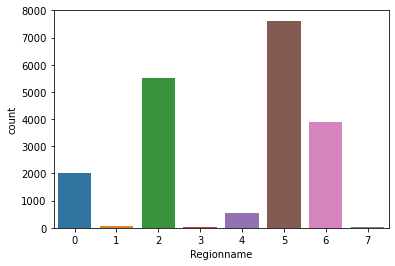

In [121]:
sns.countplot(df.Regionname)

In [122]:
#Propertycount
len(df.Propertycount.unique())

325

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Propertycount'>

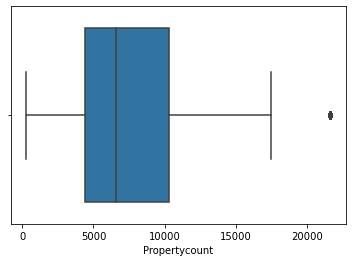

In [123]:
sns.boxplot(df.Propertycount)

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Propertycount', ylabel='Density'>

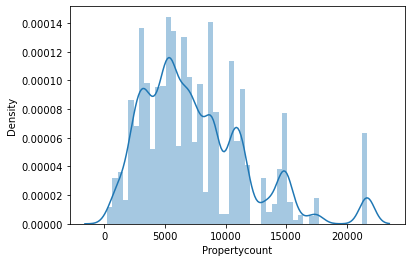

In [124]:
sns.distplot(df.Propertycount)

In [125]:
#Date
len(df.Date.value_counts())

26

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='count'>

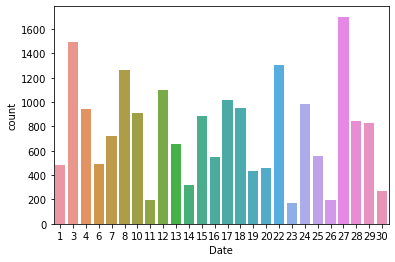

In [126]:
sns.countplot(df.Date)

In [127]:
#Month
df.Month.value_counts()

5     3416
6     3175
7     2958
11    1787
8     1719
4     1520
9     1469
3     1110
12    1000
10     852
2      731
1        3
Name: Month, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

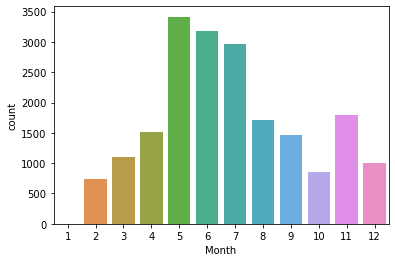

In [128]:
sns.countplot(df.Month)

In [129]:
#Year
df.Year.value_counts()

2016    10292
2017     9448
Name: Year, dtype: int64

C:\Users\syeda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

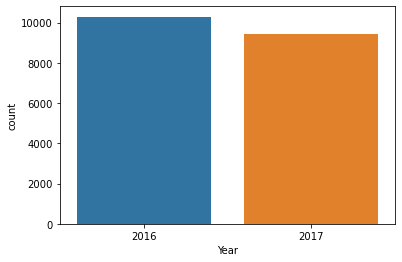

In [130]:
sns.countplot(df.Year)

# Building the Model

In [131]:
x=df.drop(['Price'],axis=1)
y=df.Price

In [132]:
x

,Rooms,Type,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Regionname,Propertycount,Date,Month,Year
0,2,1,9,2.50,3067.0,2.0,1.0,1.0,-37.80140,144.99580,2,4019.0,3,9,2016
1,2,1,1,2.50,3067.0,2.0,1.0,1.0,-37.79960,144.99840,2,4019.0,3,12,2016
2,2,1,1,2.50,3067.0,2.0,1.0,0.0,-37.80790,144.99340,2,4019.0,4,2,2016
3,3,2,4,2.50,3067.0,3.0,2.0,1.0,-37.81140,145.01160,2,4019.0,4,2,2016
4,3,1,2,2.50,3067.0,3.0,2.0,0.0,-37.80930,144.99440,2,4019.0,4,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19735,2,2,3,4.60,3181.0,3.0,1.0,1.0,-37.67681,145.00323,5,4380.0,29,7,2017
19736,3,1,1,22.35,3298.5,3.0,2.0,2.0,-37.75884,145.00264,2,2940.0,29,7,2017
19737,2,1,2,6.30,3013.0,3.0,2.0,2.0,-37.75948,144.99615,6,6543.0,29,7,2017
19738,6,1,4,6.30,3013.0,3.0,2.0,1.0,-37.70322,144.88236,6,6543.0,29,7,2017


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 8)

In [135]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [136]:
model_le=le.fit(x_train,y_train)

In [137]:
y_pred=model_le.predict(x_test)
r2=r2_score(y_test,y_pred)
print('R.sqr: ',r2)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: ',rmse)

R.sqr:  0.3812245181236853
RMSE:  314557.79519698065


In [138]:
res=(y_test-y_pred)
print('Res: ',res)

Res:  7194      -1752.658588
12275   -194878.062858
6447     315287.442016
14205    479723.958331
732     -343601.708432
             ...      
13258    -86861.056014
13368   -310005.120696
4874    -182324.319998
8363     379427.624757
224       49804.755396
Name: Price, Length: 3948, dtype: float64


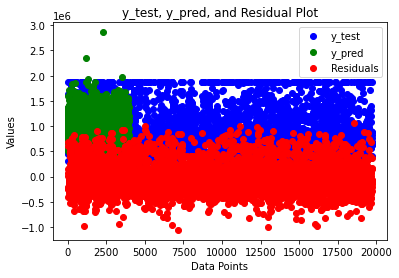

In [139]:
plt.plot(y_test, 'bo', label='y_test')
plt.plot(y_pred, 'go', label='y_pred')
plt.plot(res, 'ro', label='Residuals')
plt.hlines(y=0, xmin=0, xmax=7, linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('y_test, y_pred, and Residual Plot')
plt.legend(loc='best')
plt.show()

# Decision Tree

In [140]:
x=df.drop(['Price'],axis=1)
y=df.Price

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 8)

In [142]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)

In [143]:
model_dt=dt.fit(x_train,y_train)

In [155]:
y_pred=model_dt.predict(x_test)
r2=r2_score(y_test,y_pred)
print('R.sqr: ',r2)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: ',rmse)

R.sqr:  0.17934138759607443
RMSE:  362255.6513264159


In [156]:
res=(y_test-y_pred)
res

7194    -134000.0
12275    -90000.0
6447    -289437.5
14205    526000.0
732           0.0
           ...   
13258   -338000.0
13368   -225000.0
4874    -223000.0
8363     528000.0
224     -213000.0
Name: Price, Length: 3948, dtype: float64

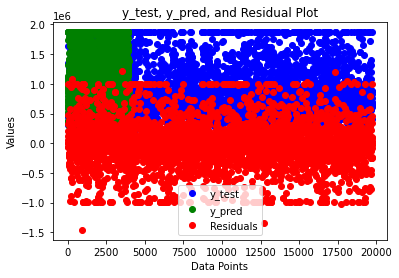

In [157]:
plt.plot(y_test, 'bo', label='y_test')
plt.plot(y_pred, 'go', label='y_pred')
plt.plot(res, 'ro', label='Residuals')
plt.hlines(y=0, xmin=0, xmax=7, linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('y_test, y_pred, and Residual Plot')
plt.legend(loc='best')
plt.show()

# Random Forest

In [147]:
x=df.drop(['Price'],axis=1)
y=df.Price

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 8)

In [149]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=0)

In [150]:
model_rf=rf.fit(x_train,y_train)

In [158]:
y_pred=model_rf.predict(x_test)
r2=r2_score(y_test,y_pred)
print('R.sqr: ',r2)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: ',rmse)

R.sqr:  0.5502717963415094
RMSE:  268169.24276336614


In [159]:
res=(y_test-y_pred)
res

7194     -48700.000
12275   -124900.000
6447     -26459.375
14205    250570.000
732     -189459.375
            ...    
13258   -275540.000
13368   -162730.000
4874    -164493.000
8363     325507.500
224      -74475.000
Name: Price, Length: 3948, dtype: float64

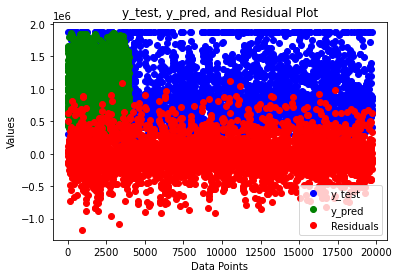

In [160]:
plt.plot(y_test, 'bo', label='y_test')
plt.plot(y_pred, 'go', label='y_pred')
plt.plot(res, 'ro', label='Residuals')
plt.hlines(y=0, xmin=0, xmax=7, linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('y_test, y_pred, and Residual Plot')
plt.legend(loc='best')
plt.show()